# Using the PETITE utilities to generate new integrator maps
Authors: Kevin J. Kelly (Texas A&M), Nikita Blinov (U. Victoria), Ryan Plestid (Caltech), Patrick J. Fox (Fermilab), and Pedro A.M. Machado (Fermilab)

! Warning: running this can be time consuming !

* First we will generate all the Standard Model processes ('Brem', 'PairProd', 'Comp', 'Ann', 'Moller', 'Bhabha') for a range of energies.
* Second we will generate integrators for dark Bremsstrahlung for a range of dark vector masses



In [2]:
# import necessary functions
from generate_integrators import *
from find_maxes import *
import numpy as np
import sys, os
path = os.getcwd()
path = os.path.split(path)[0]
print(path)

/home/pedro/projects/PETITE


In [4]:
##################################
##         SM processes         ##
##################################
# List of incoming particle energies at which to calculate integrators for each process
initial_energy_list = np.logspace(np.log10(0.01), np.log10(100), 2)
# Necessary parameters for generating the integrators, note save_location should be altered as preferred
training_params = {'verbosity':True, 'initial_energy_list':initial_energy_list,
                   'save_location':path + '/user_test',
                   'run_find_maxes':True}
# Necessary parameters for processing the integrators to determine cross sections
processing_params = {'process_targets':['graphite','lead'], 'save_location':path + '/user_test'}
#args = training_params.update(processing_params)
# List of processes to do
processes_to_do = ['Brem', 'PairProd', 'Comp', 'Ann', 'Moller', 'Bhabha']
# Loop over processes, carrying out each step of the calculation, they can also be called in one command generate_integrators
for process in processes_to_do:
    make_integrators(training_params, process)
    stitch_integrators(training_params['save_location'] + '/' + process + '/')
    cleanup(training_params['save_location'] + "/" + process + "/")
# List of processes to run find_maxes on, need not be the same as list above
find_maxes_processes_to_do = ['Brem', 'PairProd', 'Comp', 'Ann', 'Moller', 'Bhabha']
call_find_maxes(processing_params, find_maxes_processes_to_do)


Parameters:
{'verbosity': True, 'initial_energy_list': array([1.e-02, 1.e+02]), 'save_location': '/Users/pjfox/Dropbox/Physics/Current_Projects/DarkShowers/PETITE/user_test', 'run_find_maxes': True, 'process_targets': ['graphite', 'lead'], 'A_T': 1, 'Z_T': 1, 'mT': 1.0, 'm_e': 0.0005109989499999999, 'alpha_FS': 0.007297352573756914}
Doing process:  Bhabha
Starting VEGAS for energy index  0
Integrator set up Bhabha {'verbosity': True, 'initial_energy_list': array([1.e-02, 1.e+02]), 'save_location': '/Users/pjfox/Dropbox/Physics/Current_Projects/DarkShowers/PETITE/user_test', 'run_find_maxes': True, 'process_targets': ['graphite', 'lead'], 'A_T': 1, 'Z_T': 1, 'mT': 1.0, 'm_e': 0.0005109989499999999, 'alpha_FS': 0.007297352573756914, 'E_inc': 0.01, 'mV': 0.0, 'Eg_min': 0.001, 'Ee_min': 0.005}
Starting VEGAS for energy index  1
Integrator set up Bhabha {'verbosity': True, 'initial_energy_list': array([1.e-02, 1.e+02]), 'save_location': '/Users/pjfox/Dropbox/Physics/Current_Projects/DarkSho

In [23]:
##################################
##         Dark processes       ##
##################################
initial_energy_list = np.logspace(np.log10(0.01), np.log10(100), 2)
# Dark vector masses in GeV
mV_list = [0.001, 0.003, 0.010, 0.030, 0.100, 0.300, 1.00]
save_location = path + '/user_test'
training_params = {'verbosity':True, 'initial_energy_list':initial_energy_list,
                   'save_location':save_location,
                   'run_find_maxes':True, 'mV_list':mV_list, 'training_target':'hydrogen', 'mT':200.0}
processes_to_do = ['DarkBrem']

for mV in mV_list:
    process = 'DarkBrem'
    if mV > initial_energy_list[0]:
        initial_energy_list = np.logspace(np.log10(1.01*mV), np.log10(initial_energy_list[-1]), len(initial_energy_list))
        training_params.update({'initial_energy_list':initial_energy_list})
    training_params.update({"mV":mV})
    make_integrators(training_params, process)
    stitch_integrators(training_params['save_location'] + '/DarkBrem/mV_' + str(int(np.floor(mV*1000.))) + "MeV/")
    cleanup(training_params['save_location'] + '/DarkBrem/mV_' + str(int(np.floor(mV*1000.))) + "MeV/")

processing_params = {'process_targets':['graphite','lead'], 'save_location':save_location}
call_find_maxes(processing_params, processes_to_do)

# OLD BELOW, CLEANUP!?

In [24]:
processing_params = {'process_targets':['graphite','lead'], 'save_location':"/Users/kjkelly/Dropbox/GitHub/PETITE/pfpm_test"}
call_find_maxes(processing_params, processes_to_do)

Now running find_maxes....please wait
Parameters used in find_maxes:  {'process_targets': ['graphite', 'lead'], 'save_location': '/Users/kjkelly/Dropbox/GitHub/PETITE/pfpm_test', 'process': ['Brem', 'PairProd', 'Comp', 'Ann', 'Moller', 'Bhabha'], 'neval': 300, 'n_trials': 100}
List of processes:  ['Brem', 'PairProd', 'Comp', 'Ann', 'Moller', 'Bhabha']
List of target materials:  ['graphite', 'lead']
File being processed:  /Users/kjkelly/Dropbox/GitHub/PETITE/pfpm_test/Brem/Brem_AdaptiveMaps.npy
File being processed:  /Users/kjkelly/Dropbox/GitHub/PETITE/pfpm_test/PairProd/PairProd_AdaptiveMaps.npy
File being processed:  /Users/kjkelly/Dropbox/GitHub/PETITE/pfpm_test/Comp/Comp_AdaptiveMaps.npy
File being processed:  /Users/kjkelly/Dropbox/GitHub/PETITE/pfpm_test/Ann/Ann_AdaptiveMaps.npy
File being processed:  /Users/kjkelly/Dropbox/GitHub/PETITE/pfpm_test/Moller/Moller_AdaptiveMaps.npy
File being processed:  /Users/kjkelly/Dropbox/GitHub/PETITE/pfpm_test/Bhabha/Bhabha_AdaptiveMaps.npy
Sa

In [25]:
## Checking the output
# load in the cross sections that were generated
cross_sections = np.load("/Users/kjkelly/Dropbox/GitHub/PETITE/pfpm_test/Comp/Comp_0.p", allow_pickle=True)
print('Cross section keys: ', cross_sections[0].keys())
print('Adaptive map:', cross_sections[1])
# # load processed maps
# sm_maps = np.load("/Users/pmachado/projects/PETITE/paddy_test/sm_maps.pkl", allow_pickle=True)
# print('sm_map shape: ', sm_maps)
# print('sm_maps energies for Compton: ', sm_maps['Comp'][:,0], ' GeV')
# # load processed xsecs
# sm_xsecs = np.load("/Users/pmachado/projects/PETITE/paddy_test/sm_xsecs.pkl", allow_pickle=True)
# print('sm_xsecs: ', sm_xsecs)

Cross section keys:  dict_keys(['verbosity', 'initial_energy_list', 'save_location', 'run_find_maxes', 'A_T', 'Z_T', 'mT', 'm_e', 'alpha_FS', 'E_inc', 'mV', 'Eg_min', 'Ee_min', 'process'])
Adaptive map: <vegas._vegas.AdaptiveMap object at 0x104e9b400>


In [26]:
# load /home/pedro/projects/PETITE/pfpm_test/Comp/Comp_AdaptiveMaps.npy
adaptive_maps = np.load("/Users/kjkelly/Dropbox/GitHub/PETITE/pfpm_test/Comp/Comp_AdaptiveMaps.npy", allow_pickle=True)
print('file structure: ', adaptive_maps[1])

file structure:  [{'verbosity': True, 'initial_energy_list': array([1.00000000e-02, 1.84784980e-02, 3.41454887e-02, 6.30957344e-02,
        1.16591440e-01, 2.15443469e-01, 3.98107171e-01, 7.35642254e-01,
        1.35935639e+00, 2.51188643e+00, 4.64158883e+00, 8.57695899e+00,
        1.58489319e+01, 2.92864456e+01, 5.41169527e+01, 1.00000000e+02]), 'save_location': '/Users/kjkelly/Dropbox/GitHub/PETITE/pfpm_test', 'run_find_maxes': True, 'A_T': 1, 'Z_T': 1, 'mT': 1.0, 'm_e': 0.0005109989499999999, 'alpha_FS': 0.007297352573756914, 'E_inc': 0.018478497974222907, 'mV': 0.0, 'Eg_min': 0.001, 'Ee_min': 0.005, 'process': 'Comp'}


In [27]:
# load /home/pedro/projects/PETITE/pfpm_test/sm_maps.pkl
sm_maps = np.load("/Users/kjkelly/Dropbox/GitHub/PETITE/pfpm_test/sm_maps.pkl", allow_pickle=True)
sm_xsec = np.load("/Users/kjkelly/Dropbox/GitHub/PETITE/pfpm_test/sm_xsec.pkl", allow_pickle=True)
print(sm_maps['Comp'][0])
print(sm_maps['Comp'][1])

[0.01, {'neval': 300, 'max_F': 0.47166033413477204, 'adaptive_map': <vegas._vegas.AdaptiveMap object at 0x12055bc00>, 'Eg_min': 0.001, 'Ee_min': 0.005}]
[0.018478497974222907, {'neval': 300, 'max_F': 0.3001587989959389, 'adaptive_map': <vegas._vegas.AdaptiveMap object at 0x12035b200>, 'Eg_min': 0.001, 'Ee_min': 0.005}]


In [28]:
sm_maps.keys()

dict_keys(['Brem', 'PairProd', 'Comp', 'Ann', 'Moller', 'Bhabha'])

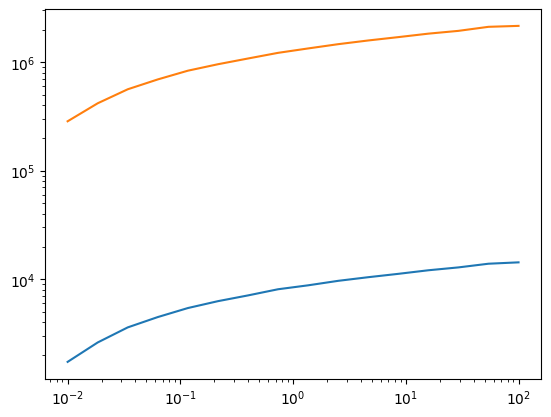

In [29]:
import matplotlib.pyplot as plt

x0, y0 = np.transpose(sm_xsec['Brem']['graphite'])
plt.plot(x0, y0)
x0, y0 = np.transpose(sm_xsec['Brem']['lead'])
plt.plot(x0, y0)

plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
